In [1]:
import os, sys

print("Working dir:" + os.getcwd())
print("Python version:" + sys.version)

Working dir:/Users/kin/Library/Mobile Documents/com~apple~CloudDocs/Year 4/AI/Coursework
Python version:3.9.18 (main, Jan 16 2024, 15:38:36) 
[Clang 14.0.0 (clang-1400.0.29.202)]


In [2]:
from copy import deepcopy
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import lines

In [3]:
import networkx as nx

print("networkx version: " + nx.__version__)

networkx version: 3.2.1


In [4]:
from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display

print("ipywidgets version: " + widgets.__version__)

ipywidgets version: 8.1.5


In [5]:
AIMA_TOOLBOX_ROOT = "/Users/kin/Library/Mobile Documents/com~apple~CloudDocs/Year 4/AI/Lab/lab_week2 /aima-python-uofg_v20212022a"
sys.path.append(AIMA_TOOLBOX_ROOT)

In [6]:
from search import *
from notebookutils import psource, heatmap, gaussian_kernel, show_map, final_path_colors, display_visual, plot_NQueens
# Needed to hide warnings in the matplotlib sections
import warnings

warnings.filterwarnings("ignore")

In [88]:
# import random
# from mazelib import Maze
# from mazelib.generate.Prims import Prims
#
# N = 30
# m = Maze()
# m.generator = Prims(int(N / 2), int(N / 2))
# m.generate()
# m.generate_entrances(True, True)
#
# start_row, start_col = m.start
# goal_row, goal_col = m.end
#
# m.grid[start_row][start_col] = 0
# m.grid[goal_row][goal_col] = 0
#
# print(m)
# print("Start coordinates:", m.start)
# print("Value at start location:", m.grid[start_row][start_col])
# print("Goal coordinates:", m.end)
# print("Value at goal location:", m.grid[goal_row][goal_col])

###########################S###
#   #   # #   #             # #
# ### ### # ######### ####### #
# # #       # # #   #       # #
# # ### # ### # ### # ####### #
#   # # # #   #       # #     #
# ### ### # ##### # # # ### ###
# # #   # #       # # #     # #
# # # ### ####### ### ### ### #
# #   #     # # # # #   # #   #
# ### # ### # # ### ### # # ###
#       # # # # #       # #   #
# ##### # # # # ####### # # ###
# # # # #       # #   #   #   #
### # ####### # # # ### # # ###
# # #       # # #   # # # # # #
# # ####### # # ### # # ### # #
# #   #     # #     #     #   #
# # ### # # ####### ### ### ###
#       # #     #     #   #   #
# ### ######### # ### # # # # #
# #   #   # #       # # # # # #
######### # ##### ##### # # # #
#       #         # #   # # # #
# ### ### # ##### # # ####### #
#   #     # #                 #
# ### ############### ### # ###
#   # #     #         #   #   #
# ### ##### ### # # # ### # # #
# #   #         # # # #   # # #
###########E###################
Start co

Teleportation Links: [((25, 16), (19, 11)), ((13, 17), (1, 25)), ((17, 28), (23, 6)), ((6, 23), (5, 25)), ((25, 14), (21, 15)), ((12, 23), (27, 3)), ((5, 27), (1, 25)), ((17, 19), (8, 3)), ((7, 24), (3, 13))]


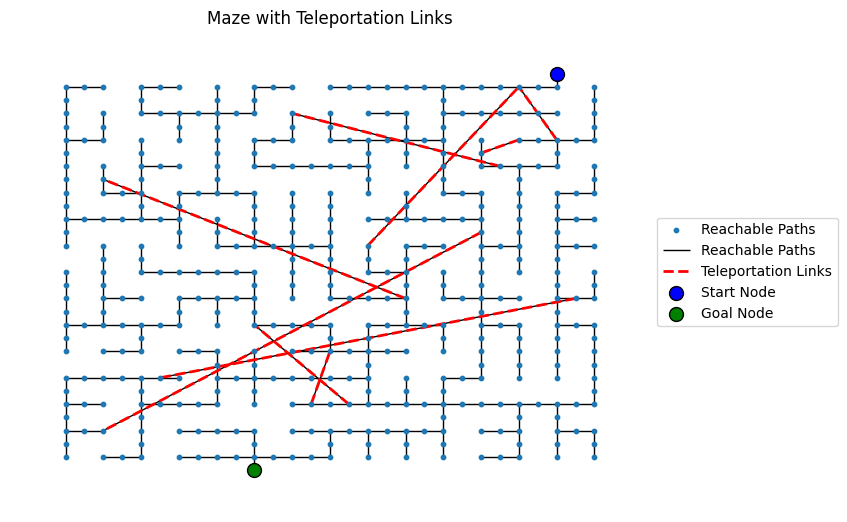

In [103]:
# teleport_links = []
# num_teleports = 9
#
# rows, cols = len(m.grid), len(m.grid[0])
#
# for _ in range(num_teleports):
#         valid_link = False
#         while not valid_link:
#             x1, y1 = random.choice(range(len(m.grid))), random.choice(range(len(m.grid[0])))
#             x2, y2 = random.choice(range(len(m.grid))), random.choice(range(len(m.grid[0])))
#             if m.grid[x1][y1] == 0 and m.grid[x2][y2] == 0 and (x1, y1) != (x2, y2):
#                 teleport_links.append(((x1, y1), (x2, y2)))
#                 valid_link = True
#
# print("Teleportation Links:", teleport_links)
#
#
# def visualise_maze_with_teleports(maze, teleport_links):
#     rows, cols = len(maze.grid), len(maze.grid[0])
#     G = nx.Graph()
#
#     for r in range(rows):
#         for c in range(cols):
#             if maze.grid[r][c] == 0:
#                 G.add_node((r, c))
#
#     for r in range(rows):
#         for c in range(cols):
#             if maze.grid[r][c] == 0:
#                 if r > 0 and maze.grid[r - 1][c] == 0:
#                     G.add_edge((r, c), (r - 1, c))
#                 if c > 0 and maze.grid[r][c - 1] == 0:
#                     G.add_edge((r, c), (r, c - 1))
#
#     for (src, dest) in teleport_links:
#         G.add_edge(src, dest, color='red', style='dashed')
#
#     pos = {(r, c): (c, -r) for r, c in G.nodes()}
#     nx.draw(G, pos, with_labels=False, node_size=10, edge_color='black', label='Reachable Paths')
#
#     teleport_edges = [(src, dest) for (src, dest) in teleport_links]
#     nx.draw_networkx_edges(G, pos, edgelist=teleport_edges, edge_color='red', style='dashed', width=2,
#                            label='Teleportation Links')
#
#     start_node = m.start
#     goal_node = m.end
#     if start_node in G.nodes():
#         nx.draw_networkx_nodes(G, pos, nodelist=[start_node], node_color='blue', label='Start Node', node_size=100,
#                                edgecolors='black')
#     if goal_node in G.nodes():
#         nx.draw_networkx_nodes(G, pos, nodelist=[goal_node], node_color='green', label='Goal Node', node_size=100,
#                                edgecolors='black')
#
#     plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#     plt.title("Maze with Teleportation Links")
#     plt.show()
#
#
# visualise_maze_with_teleports(m, teleport_links)

In [41]:
import heapq

def astar_search(maze, start, goal, teleport_links):
    open_set = []
    heapq.heappush(open_set, (0, start))
    came_from = {}
    g_score = {start: 0}
    f_score = {start: manhattan_distance(start, goal)}

    steps = 0

    while open_set:
        _, current = heapq.heappop(open_set)
        steps += 1

        if current == goal:
            return reconstruct_path(came_from, current), steps

        for neighbor in get_neighbors(maze, current, teleport_links):
            tentative_g_score = g_score[current] + 1
            if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = tentative_g_score + manhattan_distance(neighbor, goal)
                heapq.heappush(open_set, (f_score[neighbor], neighbor))

    return None, steps

def manhattan_distance(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def get_neighbors(maze, current, teleport_links):
    neighbors = []
    rows, cols = len(maze.grid), len(maze.grid[0])
    r, c = current

    directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]
    for dr, dc in directions:
        nr, nc = r + dr, c + dc
        if 0 <= nr < rows and 0 <= nc < cols and maze.grid[nr][nc] == 0:
            neighbors.append((nr, nc))

    for (src, dest) in teleport_links:
        if src == current:
            neighbors.append(dest)
    return neighbors

def reconstruct_path(came_from, current):
    path = [current]
    while current in came_from:
        current = came_from[current]
        path.append(current)
    path.reverse()
    return path

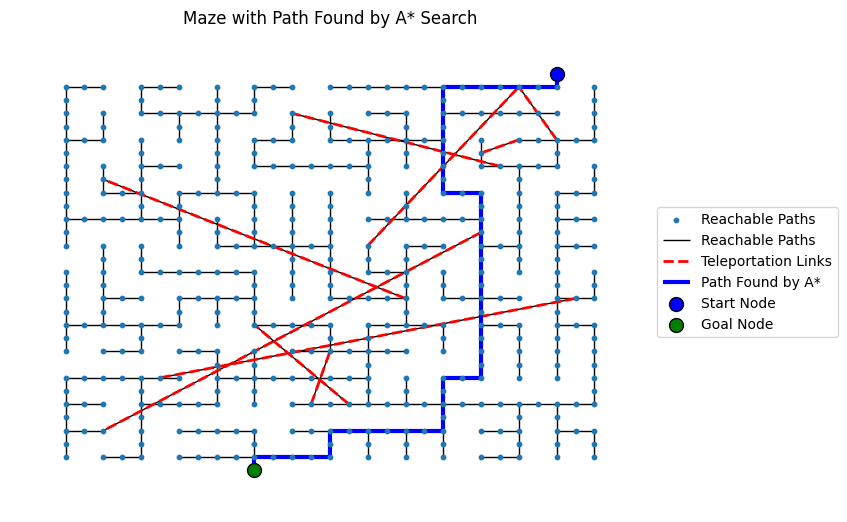

Number of steps taken by A* search: 147


In [104]:
# import matplotlib.pyplot as plt
# import networkx as nx
#
# def visualise_maze_with_path(maze, teleport_links, path):
#     rows, cols = len(maze.grid), len(maze.grid[0])
#     G = nx.Graph()
#
#     for r in range(rows):
#         for c in range(cols):
#             if maze.grid[r][c] == 0:
#                 G.add_node((r, c))
#
#     for r in range(rows):
#         for c in range(cols):
#             if maze.grid[r][c] == 0:
#                 if r > 0 and maze.grid[r - 1][c] == 0:
#                     G.add_edge((r, c), (r - 1, c))
#                 if c > 0 and maze.grid[r][c - 1] == 0:
#                     G.add_edge((r, c), (r, c - 1))
#
#     for (src, dest) in teleport_links:
#         G.add_edge(src, dest, color='red', style='dashed')
#
#     pos = {(r, c): (c, -r) for r, c in G.nodes()}
#     nx.draw(G, pos, with_labels=False, node_size=10, edge_color='black', label='Reachable Paths')
#
#     teleport_edges = [(src, dest) for (src, dest) in teleport_links]
#     nx.draw_networkx_edges(G, pos, edgelist=teleport_edges, edge_color='red', style='dashed', width=2, label='Teleportation Links')
#
#     if path:
#         path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
#         nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='blue', width=3, label='Path Found by A*')
#
#     start_node = maze.start
#     goal_node = maze.end
#     if start_node in G.nodes():
#         nx.draw_networkx_nodes(G, pos, nodelist=[start_node], node_color='blue', label='Start Node', node_size=100, edgecolors='black')
#     if goal_node in G.nodes():
#         nx.draw_networkx_nodes(G, pos, nodelist=[goal_node], node_color='green', label='Goal Node', node_size=100, edgecolors='black')
#
#     plt.title("Maze with Path Found by A* Search")
#     plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#     plt.show()
#     print(f"Number of steps taken by A* search: {steps}")
#
# path, steps = astar_search(m, m.start, m.end, teleport_links)
# visualise_maze_with_path(m, teleport_links, path)

Number of teleport links 0: Number of steps 450
Number of teleport links 1: Number of steps 450
Number of teleport links 2: Number of steps 451
Number of teleport links 3: Number of steps 450
Number of teleport links 4: Number of steps 450
Number of teleport links 5: Number of steps 450
Number of teleport links 6: Number of steps 459
Number of teleport links 7: Number of steps 468
Number of teleport links 8: Number of steps 494
Number of teleport links 9: Number of steps 486
Number of teleport links 10: Number of steps 477


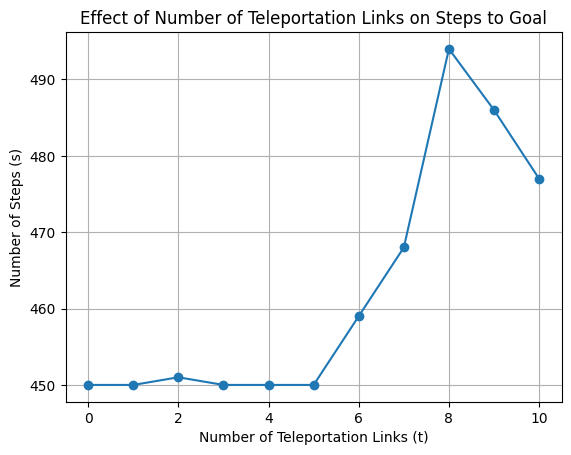

In [85]:
#task 3 random teleport links
import random
from mazelib import Maze
from mazelib.generate.Prims import Prims
import matplotlib.pyplot as plt

N = 30
steps_list = []

m = Maze()
m.generator = Prims(int(N / 2), int(N / 2))
m.generate()
m.generate_entrances(True, True)

for t in range(0, 11):
    teleport_links = []
    for _ in range(t):
        valid_link = False
        while not valid_link:
            x1, y1 = random.choice(range(len(m.grid))), random.choice(range(len(m.grid[0])))
            x2, y2 = random.choice(range(len(m.grid))), random.choice(range(len(m.grid[0])))
            if m.grid[x1][y1] == 0 and m.grid[x2][y2] == 0 and (x1, y1) != (x2, y2):
                teleport_links.append(((x1, y1), (x2, y2)))
                valid_link = True

    path, steps = astar_search(m, m.start, m.end, teleport_links)
    steps_list.append(steps)

    print(f"Number of teleport links {t}: Number of steps {steps}")

plt.plot(range(0, 11), steps_list, marker='o')
plt.xlabel('Number of Teleportation Links (t)')
plt.ylabel('Number of Steps (s)')
plt.title('Effect of Number of Teleportation Links on Steps to Goal')
plt.grid(True)
plt.show()


Number of teleport links 0: Number of steps 450
Number of teleport links 1: Number of steps 450
Number of teleport links 2: Number of steps 451
Number of teleport links 3: Number of steps 554
Number of teleport links 4: Number of steps 587
Number of teleport links 5: Number of steps 589
Number of teleport links 6: Number of steps 589
Number of teleport links 7: Number of steps 590
Number of teleport links 8: Number of steps 592
Number of teleport links 9: Number of steps 593
Number of teleport links 10: Number of steps 593


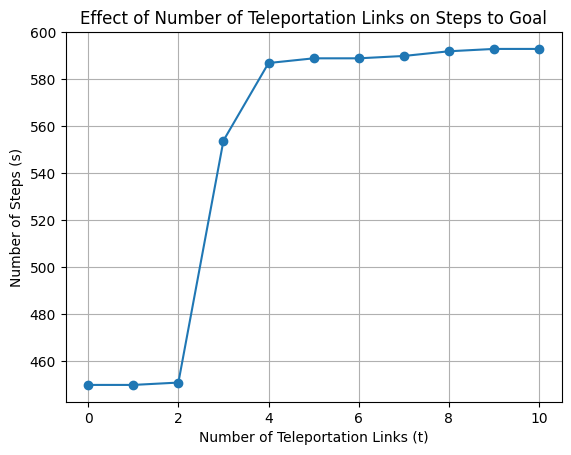

In [106]:
# Incremental Teleport Link Generation for Task 3
import random
from mazelib import Maze
from mazelib.generate.Prims import Prims
import matplotlib.pyplot as plt

N = 30
steps_list = []

m = Maze()
m.generator = Prims(int(N / 2), int(N / 2))
m.generate()
m.generate_entrances(True, True)

teleport_links = []

for t in range(0, 11):
    if t > 0:
        valid_link = False
        while not valid_link:
            x1, y1 = random.choice(range(len(m.grid))), random.choice(range(len(m.grid[0])))
            x2, y2 = random.choice(range(len(m.grid))), random.choice(range(len(m.grid[0])))
            if m.grid[x1][y1] == 0 and m.grid[x2][y2] == 0 and (x1, y1) != (x2, y2):
                teleport_links.append(((x1, y1), (x2, y2)))
                valid_link = True

    path, steps = astar_search(m, m.start, m.end, teleport_links)
    steps_list.append(steps)

    print(f"Number of teleport links {t}: Number of steps {steps}")

plt.plot(range(0, 11), steps_list, marker='o')
plt.xlabel('Number of Teleportation Links (t)')
plt.ylabel('Number of Steps (s)')
plt.title('Effect of Number of Teleportation Links on Steps to Goal')
plt.grid(True)
plt.show()